# Convolutional Neural Network For Fire detection

**Importing dependencies**

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls

# Data Spliting

### Preprocessing the Training set

In [2]:
batch_Size = 32
image_Size = 64
epochs = 10
channels = 3

In [3]:
train_data_generation = ImageDataGenerator(rescale= 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
data_path = 'dataset_M'

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(data_path,
                                                          validation_split=0.2,
                                                          subset="training",
                                                          seed=123,
                                                          image_size=(image_Size , image_Size ),
                                                          batch_size=batch_Size)

Found 2401 files belonging to 2 classes.
Using 1921 files for training.


### Preprocessing the Test set

In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_path,
                                                    validation_split=0.2,
                                                    subset="validation",
                                                    seed=123,
                                                    image_size=(image_Size , image_Size ),
                                                    batch_size=batch_Size)

Found 2401 files belonging to 2 classes.
Using 480 files for validation.


check the data and the properties of data

In [7]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Checking the class names of the dataset

In [8]:
labels = training_set.class_names
labels

['Fire', 'Non fire']

# Data Visualization

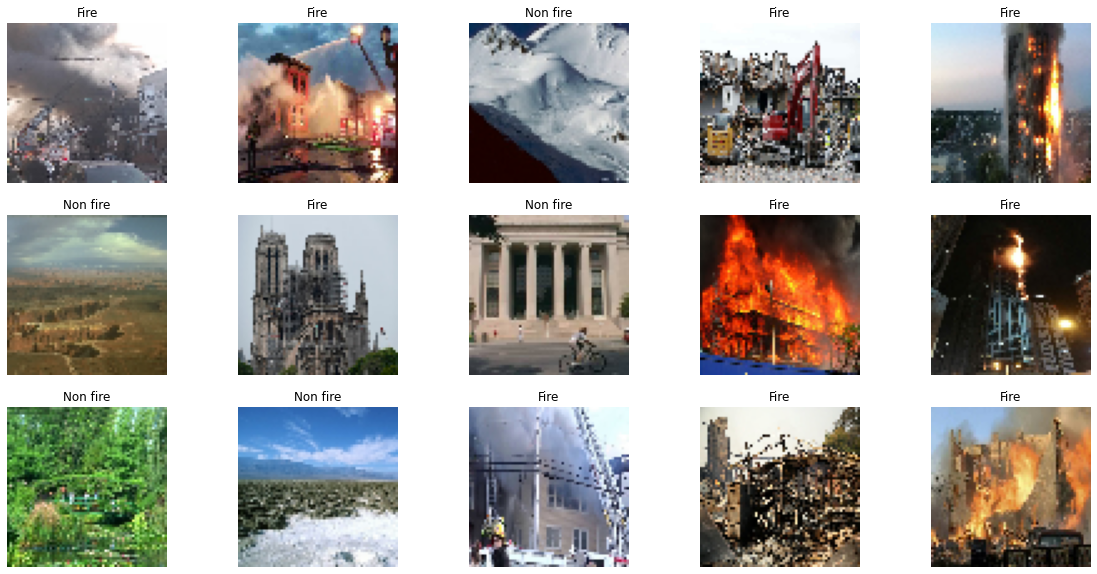

In [9]:
plt.figure(figsize=(20,10))
for imgBatch, labelBatch in training_set.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

# Scaling & Modeling

In [10]:
from tensorflow.keras import layers, Sequential

In [11]:
scaling = tf.keras.Sequential([
                                layers.experimental.preprocessing.Resizing(196, 196),
                                ## Normalize pixel values to be between 0 to 1
                                layers.experimental.preprocessing.Rescaling(1./255.)
])

In [12]:
model = Sequential([scaling,
                    layers.Conv2D(64, kernel_size=(3,3) ,activation='relu', input_shape=[64,64,3]),
                    layers.MaxPooling2D(2,2),
                    layers.Conv2D(64,3, activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Conv2D(128,3, activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Dropout(0.1),
                    layers.Conv2D(128,3, activation='relu'),
                    layers.Conv2D(64,3, activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Dropout(0.1),
                    layers.Conv2D(64,3, activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Flatten(),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
Trained_model = model.fit(training_set,
                          batch_size=batch_Size,
                          validation_data=val_ds
                          epochs=epochs)

Epoch 1/10
61/61 [==============================] - 295s 5s/step - loss: 0.5597 - accuracy: 0.6991 - val_loss: 0.5096 - val_accuracy: 0.7542
Epoch 2/10
61/61 [==============================] - 253s 4s/step - loss: 0.5229 - accuracy: 0.7657 - val_loss: 0.5134 - val_accuracy: 0.7667
Epoch 3/10
61/61 [==============================] - 298s 5s/step - loss: 0.4817 - accuracy: 0.7715 - val_loss: 0.4836 - val_accuracy: 0.7688
Epoch 4/10
61/61 [==============================] - 272s 4s/step - loss: 0.4589 - accuracy: 0.7913 - val_loss: 0.4527 - val_accuracy: 0.7750
Epoch 5/10
61/61 [==============================] - 264s 4s/step - loss: 0.4055 - accuracy: 0.8084 - val_loss: 0.4505 - val_accuracy: 0.7667
Epoch 6/10
61/61 [==============================] - 285s 5s/step - loss: 0.3777 - accuracy: 0.8235 - val_loss: 0.4433 - val_accuracy: 0.7979
Epoch 7/10
61/61 [==============================] - 247s 4s/step - loss: 0.3537 - accuracy: 0.8350 - val_loss: 0.4321 - val_accuracy: 0.7917
Epoch 8/10
61

# Model Evaluation

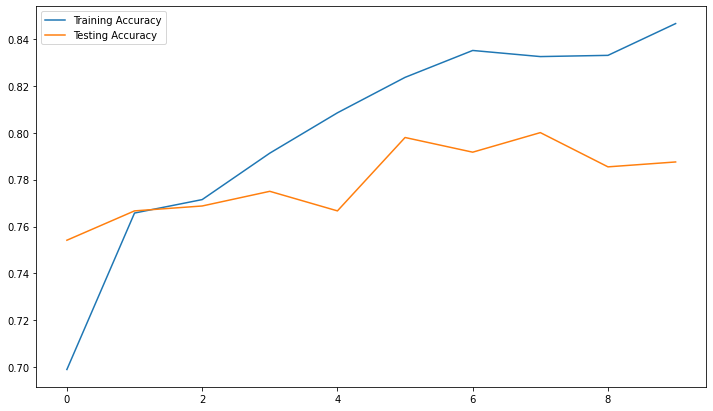

In [26]:
plt.figure(figsize=(12,7))
plt.plot(Trained_model.history['accuracy'] ,label='Training Accuracy')
plt.plot(Trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

**Accuracy For epoch 8 is look Optimum So we can retrain model with 8 epochs**

In [28]:
model_8 = Sequential([scaling,
                    layers.Conv2D(64, kernel_size=(3,3) ,activation='relu', input_shape=[64,64,3]),
                    ## Max pooling is used to extracting more information from the image
                    layers.MaxPooling2D(2,2),
                    layers.Conv2D(64,3, activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Conv2D(128,3, activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Dropout(0.1),
                    layers.Conv2D(128,3, activation='relu'),
                    layers.Conv2D(64,3, activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Dropout(0.1),
                    layers.Conv2D(64,3, activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Flatten(),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=1, activation='sigmoid')
])

### Parameter Tunning

**We can set the learning rate of optimizer**

In [ ]:
#import tensorflow
#opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

**We can apply Early stopping to avoid Overfitting issue**

In [ ]:
#import tensorflow as tf
#early_stopping = tf.keras.callbacks.EarlyStopping(
                                                  monitor='val_loss',
                                                  mode='auto',
                                                  baseline=None,
                                                  restore_best_weights=False)

In [29]:
model_8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model_8.fit(training_set,
            batch_size=batch_Size,
            validation_data=val_ds,
            epochs=8)

Epoch 1/8
61/61 [==============================] - 279s 5s/step - loss: 0.6163 - accuracy: 0.6622 - val_loss: 0.7710 - val_accuracy: 0.6042
Epoch 2/8
61/61 [==============================] - 257s 4s/step - loss: 0.5205 - accuracy: 0.7517 - val_loss: 0.5200 - val_accuracy: 0.7583
Epoch 3/8
61/61 [==============================] - 270s 4s/step - loss: 0.4832 - accuracy: 0.7772 - val_loss: 0.5063 - val_accuracy: 0.7729
Epoch 4/8
61/61 [==============================] - 288s 5s/step - loss: 0.4531 - accuracy: 0.7970 - val_loss: 0.4460 - val_accuracy: 0.8062
Epoch 5/8
61/61 [==============================] - 263s 4s/step - loss: 0.4106 - accuracy: 0.8100 - val_loss: 0.5091 - val_accuracy: 0.7542
Epoch 6/8
61/61 [==============================] - 262s 4s/step - loss: 0.4050 - accuracy: 0.8079 - val_loss: 0.4088 - val_accuracy: 0.8375
Epoch 7/8
61/61 [==============================] - 267s 4s/step - loss: 0.3572 - accuracy: 0.8313 - val_loss: 0.4047 - val_accuracy: 0.8417
Epoch 8/8
61/61 [===

## Building Predictive System

In [67]:
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array


test_image = load_img( 'forest_land81.jpg', target_size = (64,64))

test_image = img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = model_8.predict(test_image)
print(result)
#labels

if result > 0.5:
    prediction = "This is a Fire image"
else:
    prediction = "This is a Non-fire image"
print(prediction)

1/1 [==============================] - 0s 84ms/step
[[0.31694937]]
This is a Non-fire image
